# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def foo(): pass

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_format = 'retina'
%load_ext rich
import datetime
import hashlib
import json
import os
import re
import sys
import time
import warnings

import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm

register_matplotlib_converters()
import seaborn as sns
from IPython.display import Markdown, display

sns.set()
sns.set_context("poster", font_scale=1.3)
plt.rcParams["figure.figsize"] = 10, 6
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 4
warnings.simplefilter(action="ignore", category=FutureWarning)

https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-05-28

In [ ]:
raw = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-05-28/winemag-data-130k-v2.csv", index_col=0)

def raw_to_clean(raw):
    return (raw)

wine_ratings = raw_to_clean(raw)

In [ ]:
wine_ratings.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [ ]:
wine_ratings.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
# sns.regplot(x='points', y='price', data=wine_ratings)

In [ ]:
wine_ratings.describe()

,points,price
count,129971.0000,120975.0000
mean,88.4471,35.3634
std,3.0397,41.0222
min,80.0000,4.0000
25%,86.0000,17.0000
50%,88.0000,25.0000
75%,91.0000,42.0000
max,100.0000,3300.0000


In [ ]:
import matplotlib as mpl

In [ ]:
mpl.__version__

'3.6.2'

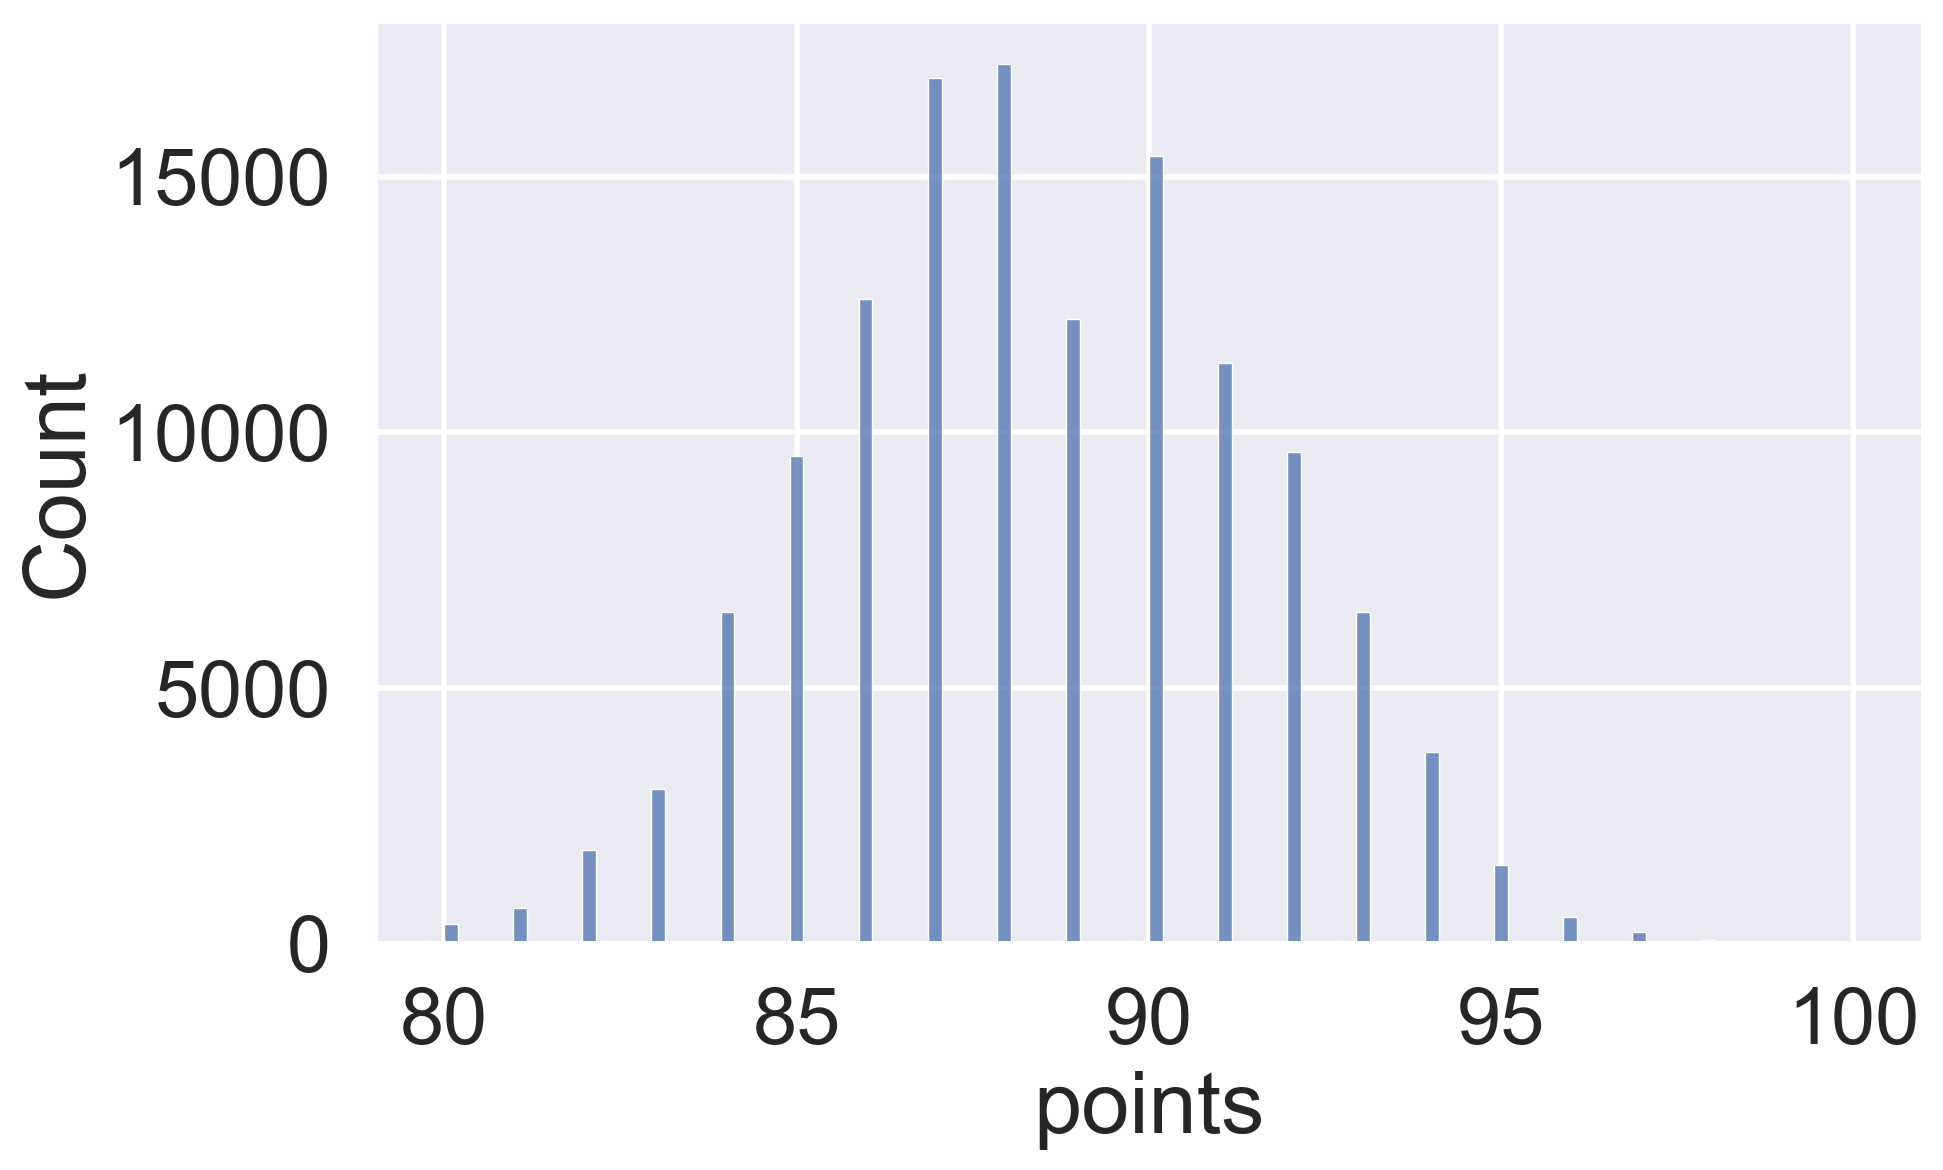

In [ ]:
sns.histplot(wine_ratings['points'])

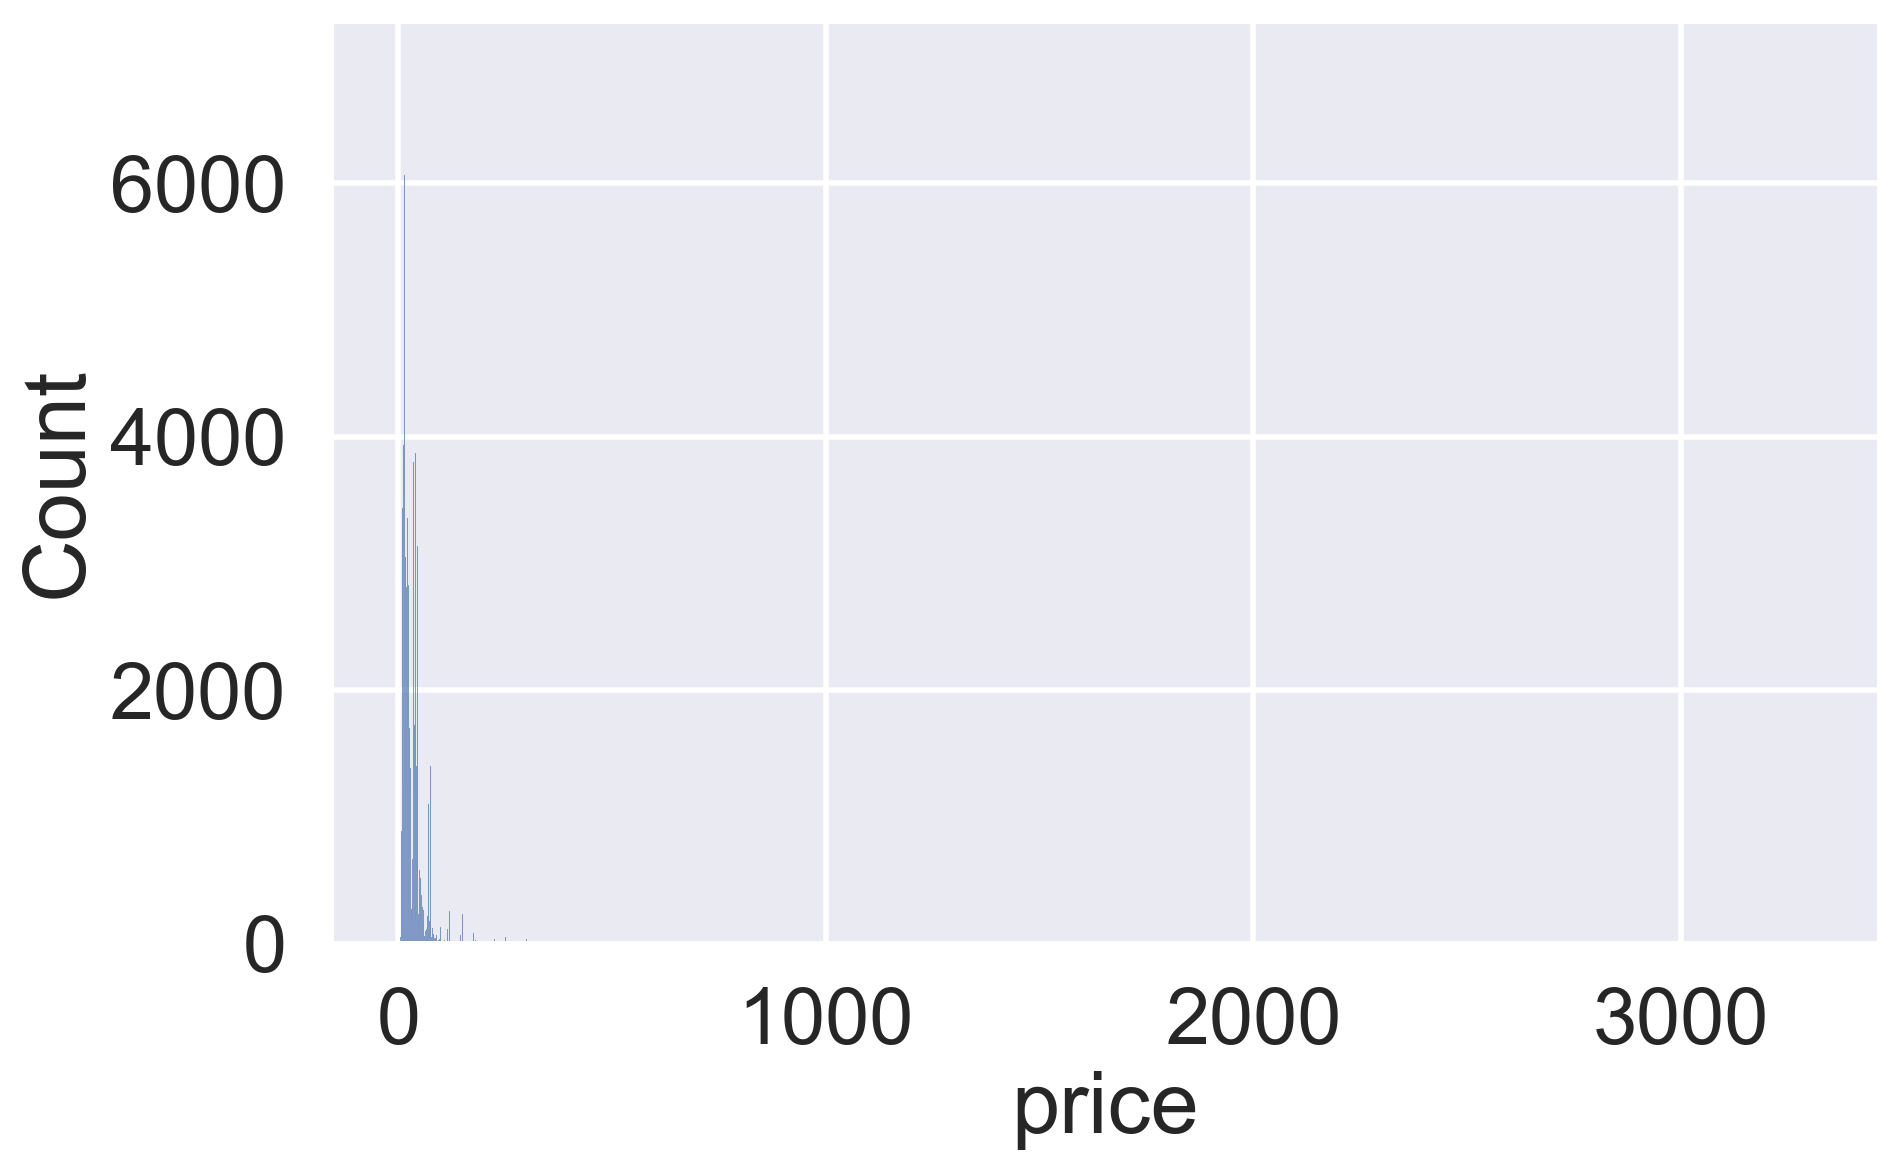

In [ ]:
sns.histplot(wine_ratings['price'])

In [ ]:
g = wine_ratings.groupby('variety').agg({'price':'mean', 'points':'mean'})
g.head()

,price,points
variety,,
Abouriou,35.0000,87.6667
Agiorgitiko,23.5714,87.0317
Aglianico,38.8878,89.2758
Aidani,27.0000,82.0000
Airen,9.0000,81.6667


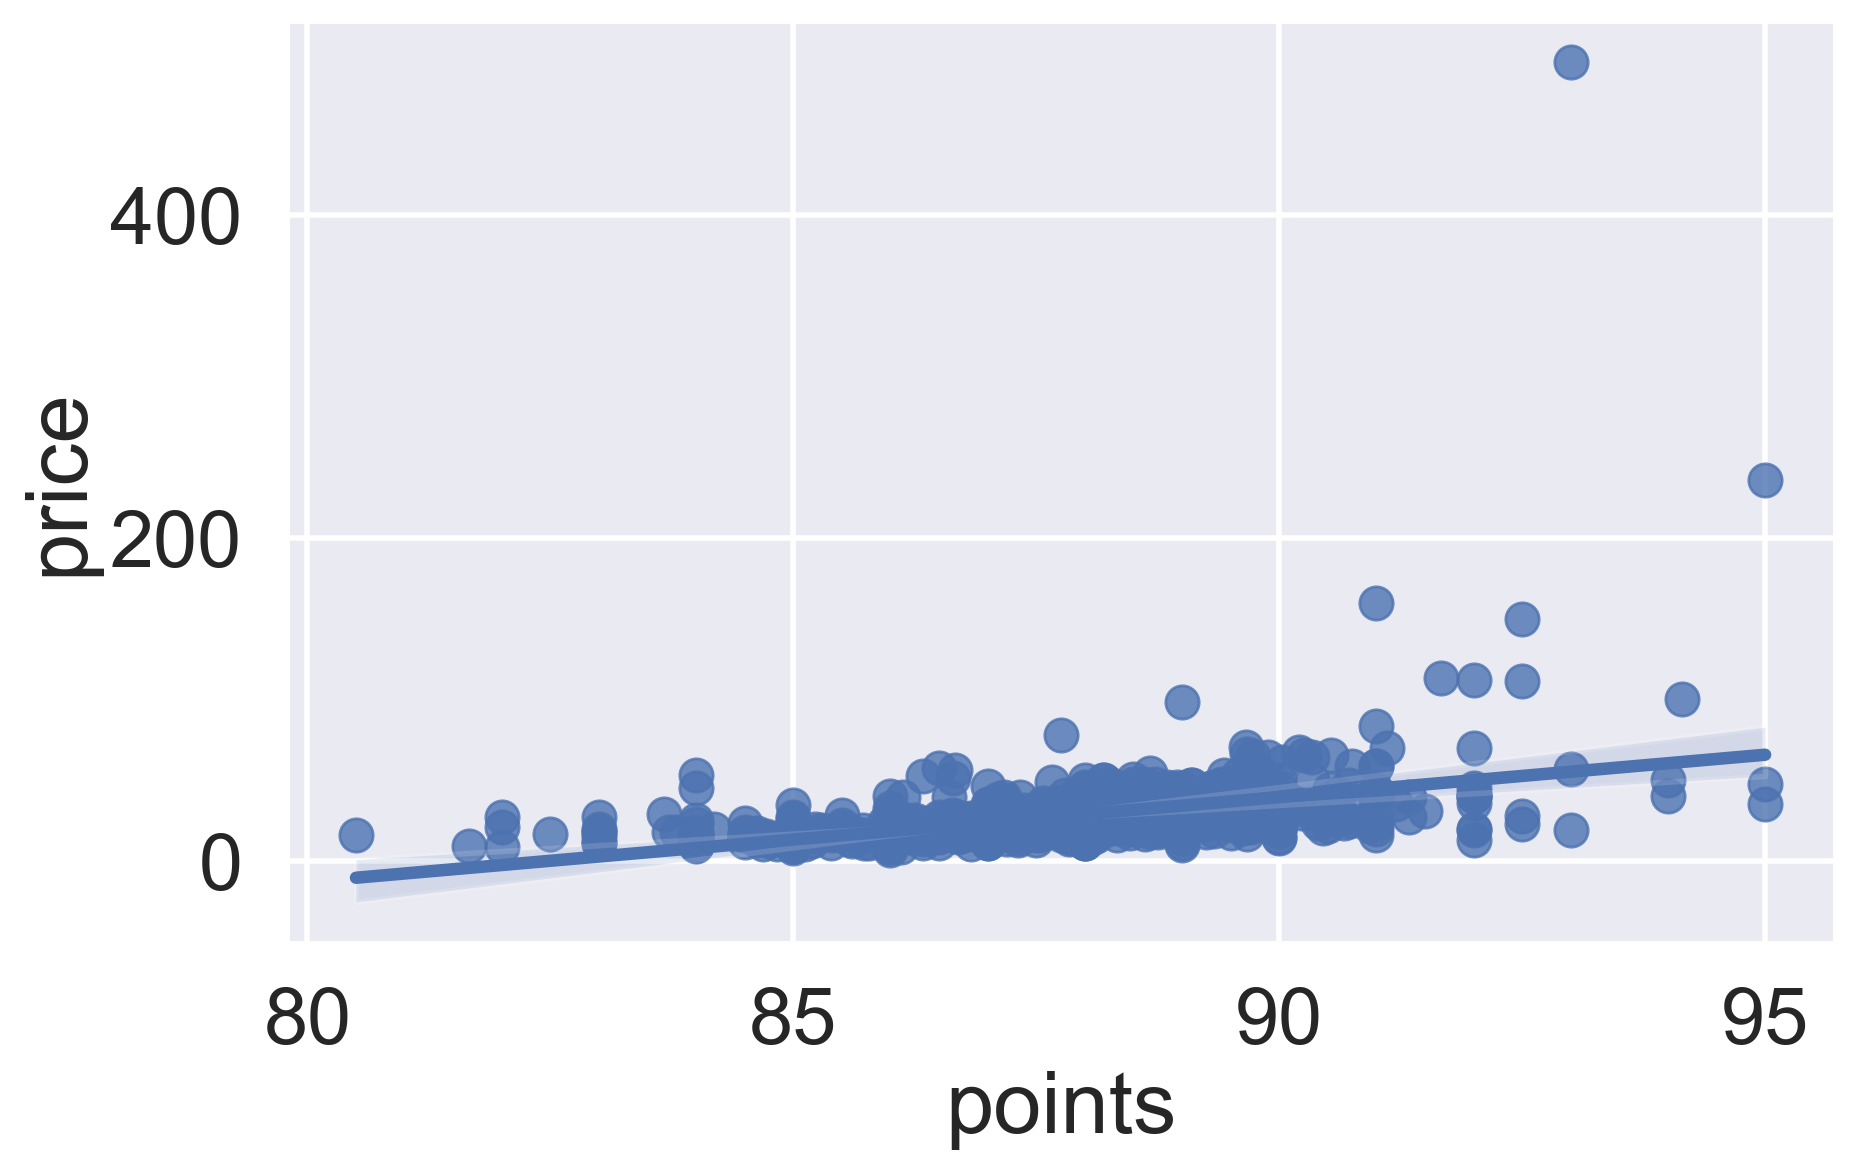

In [ ]:
sns.regplot(g, x='points',y='price')

In [ ]:
g.sort_values(by='price', ascending=False).head()

,price,points
variety,,
Ramisco,495.0000,93.0000
Terrantez,236.0000,95.0000
Francisa,160.0000,91.0000
Rosenmuskateller,150.0000,92.5000
Malbec-Cabernet,113.3333,91.6667
